In [1]:
import numpy as np
import pandas as pd
import os
import sys

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['animation.html'] = 'html5'
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'



In [18]:
fs=14
plt.rc("font",size=fs)

In [2]:
from matplotlib.lines import Line2D

### params

In [3]:
outpath       = "/Volumes/Baby-Orange/XPIA-NCAR/processed/"

z_zi_target = 0.5

In [16]:
minf    = 1/30000.
maxf    = 1/333.
filterf = 1/(333.*5)

In [21]:
factors = [5, 10, 20, 50, 90]
xlabels = ["${0}\Delta_{{gz}}$".format(a) for a in factors]
xticks  = [1/(333*a) for a in factors]

In [4]:
colors = { "les"   :"k",
          "les_raw":"k",
          "vles"   :"#808B96",
          "mynn"   :"#641E16",
          "ysu"    :"#A93226",
          "sh"     :"#D98880",}

lss =    { "les"   :"-",
          "les_raw":"-",
          "vles"   :"-",
          "mynn"   :"-",
          "ysu"    :"-",
          "sh"     :"-",}

lws =    { "les"   :2,
          "les_raw":4,
          "vles"   :2,
          "mynn"   :2,
          "ysu"    :2,
          "sh"     :2}

### i/o

In [5]:
convective      = pd.read_csv(os.path.join(outpath,"datetimes_ziL_gt_25.csv"),header=None,index_col=[0])
convective_list = np.array([ pd.Timestamp(l[0]) for l in convective.values.tolist() ])
nt              = len(convective_list)
print(nt)

269


In [7]:
year    = 2015
month   = 3
days    = [20,21,28,29,30]#,21,28,29,30]
hours   = np.arange(14,24,1)
minutes = np.arange(0,60,10)

varname     = 'w'
df_snapshot = []
datetimes   = []

for day in days:
    for hour in hours:
        for minute in minutes:
            datetime = pd.Timestamp(year=year,month=month,day=day,hour=hour,minute=minute)
            
            if datetime not in convective_list:
                print ("Skipping {0:%Y-%m-%d_%H-%M}".format(datetime))
                continue
            else:
                fin      = os.path.join(outpath,"ps_azimuthal_mean_{0:%Y-%m-%d_%H-%M}_{1}.npz".format(datetime,varname))
                sys.stdout.write('\r'+fin)                            
                dfnow    = pd.read_csv(fin, index_col=[0])
                dfnow['datetime'] = datetime
                df_snapshot.append(dfnow)
                datetimes.append(datetime)

/Volumes/Baby-Orange/XPIA-NCAR/processed/ps_azimuthal_mean_2015-03-20_23-50_w.npzSkipping 2015-03-21_14-00
Skipping 2015-03-21_14-10
Skipping 2015-03-21_14-20
/Volumes/Baby-Orange/XPIA-NCAR/processed/ps_azimuthal_mean_2015-03-28_20-10_w.npzSkipping 2015-03-28_20-20
Skipping 2015-03-28_20-30
Skipping 2015-03-28_20-40
Skipping 2015-03-28_20-50
Skipping 2015-03-28_21-00
Skipping 2015-03-28_21-10
Skipping 2015-03-28_21-20
Skipping 2015-03-28_21-30
Skipping 2015-03-28_21-40
Skipping 2015-03-28_21-50
Skipping 2015-03-28_22-00
Skipping 2015-03-28_22-10
Skipping 2015-03-28_22-20
Skipping 2015-03-28_22-30
Skipping 2015-03-28_22-40
Skipping 2015-03-28_22-50
Skipping 2015-03-28_23-00
Skipping 2015-03-28_23-10
Skipping 2015-03-28_23-20
Skipping 2015-03-28_23-30
Skipping 2015-03-28_23-40
Skipping 2015-03-28_23-50
/Volumes/Baby-Orange/XPIA-NCAR/processed/ps_azimuthal_mean_2015-03-30_22-50_w.npzSkipping 2015-03-30_23-00
Skipping 2015-03-30_23-10
Skipping 2015-03-30_23-20
Skipping 2015-03-30_23-30
Ski

### organize into multi-index dataframe

In [8]:
df_all = pd.concat(df_snapshot)

In [9]:
df_all = df_all.reset_index().set_index(['datetime','index'])

In [10]:
df_all.head()

les    les_raw      vles      mynn  \
datetime            index                                               
2015-03-20 14:00:00 0.020000  0.000003  27.016821  0.002525  0.002581   
                    0.019608  0.000002  29.385711  0.002764  0.002714   
                    0.019231  0.000002  30.514494  0.003076  0.002979   
                    0.018868  0.000004  27.255568  0.003363  0.003279   
                    0.018519  0.000005  29.654040  0.003561  0.003484   

                                   ysu        sh  
datetime            index                         
2015-03-20 14:00:00 0.020000  0.001663  0.001647  
                    0.019608  0.001630  0.001613  
                    0.019231  0.001631  0.001614  
                    0.018868  0.001780  0.001768  
                    0.018519  0.002078  0.002069

### make a little video of the spectra

In [328]:
from matplotlib.colors import LinearSegmentedColormap

anchor_colors = ['lightskyblue' , 'khaki', 'coral' , 'orangered' , 'coral', 'khaki' , 'lightskyblue']
cmap_name = 'sunrise_noon_sunset'
cm = LinearSegmentedColormap.from_list(cmap_name, anchor_colors, N=100)

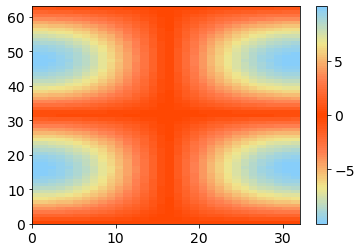

In [329]:
x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

plt.pcolormesh(Z, cmap=cm)
plt.colorbar()

In [437]:
sims_to_plot = ['les','vles','mynn','ysu','sh']

2015-03-20T14:00:00.000000000


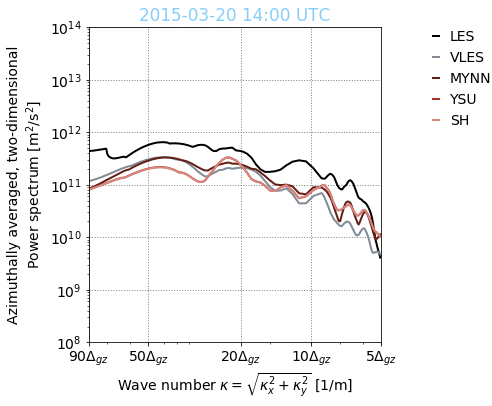

In [438]:
datetimes = np.unique(df_all.index.get_level_values(0))

fig = plt.figure(figsize=(7,6))
ax  = fig.add_subplot(111)
ax.grid(color='gray', linestyle=':', linewidth=1)

for datetime in datetimes[0:1]:
    print(datetime)
    snapshot = df_all.xs(datetime,level=0)
    idx = np.where((snapshot.index<=filterf)&(snapshot.index>=minf))
    lines = {}
    for sim in sims_to_plot:
        lw=6 if 'raw' in sim else 2
        lines[sim] = ax.loglog(snapshot.index[idx], snapshot[sim].values[idx], lw=lw, color=colors[sim], label=sim)[0]
        #texts = [ax.text(0.80, 0.95-i*0.05,  '', transform=ax.transAxes) for i in range(N)]
    
ax.set_xlabel("Wave number $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$ [1/m]")
ax.set_ylabel("Azimuthally averaged, two-dimensional\nPower spectrum [m$^2$/s$^2$]")
ax.set_xlim([minf,filterf])
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

datetime = pd.Timestamp(datetime)
difference = datetime-pd.Timestamp(year=year,month=month,day=datetime.day,hour=14,minute=0)
difference_decimal = difference.total_seconds()/(10*60*60)
    
ax.set_title("{0:%Y-%m-%d %H:%M} UTC".format(pd.Timestamp(datetime)),color=cm(difference_decimal))

ax.set_ylim([1e8,1e14])
fig.subplots_adjust(left=0.2,bottom=0.15,right=0.78)

ls     = []
labels = []
for sim in sims_to_plot:
    ls.append(Line2D([0], [0], color=colors[sim], linewidth=2, marker='None'))
    labels.append(sim.upper())
fig.legend(ls,labels,bbox_to_anchor=(1,0.9),frameon=False,handlelength=0.4)

In [439]:
def animate(i):
    
    datetime = datetimes[i]
    local_hour = (pd.Timestamp(datetime) - pd.Timedelta('6h')).hour
    snapshot = df_all.xs(datetime,level=0)

    for sim in sims_to_plot:
        lines[sim].set_data(snapshot.index[idx], snapshot[sim].values[idx])   
        lines[sim].set_label(sim)  
        
    datetime = pd.Timestamp(datetime)
    difference = datetime-pd.Timestamp(year=year,month=month,day=datetime.day,hour=14,minute=0)
    difference_decimal = difference.total_seconds()/(10*60*60)
        
    ax.set_title("{0:%Y-%m-%d %H:%M} UTC".format(pd.Timestamp(datetime)),color=cm(difference_decimal))

In [443]:
anim = FuncAnimation(fig, animate, interval=400, frames=np.arange(1,len(datetimes),1))

In [444]:
anim

In [445]:
fout = "../figs/spectra_azimuthally_averaged_{0}_z_over_zi_{1}_day_{2}_no_raw.mp4".format(varname,z_zi_target,datetime.day)
anim.save(fout)

### visualize all spectra in a specified period of time

In [11]:
subsets_by_day = {}
dayavg_by_day  = {}

for day in np.unique(df_all.index.get_level_values(0).day):
    
    print(day)

    day1  = day
    day2  = day

    hour1 = 14
    hour2 = 23

    minute1 = 0
    minute2 = 59

    start = pd.Timestamp(year=year,month=month,day=day1,hour=hour1,minute=minute1)
    end   = pd.Timestamp(year=year,month=month,day=day2,hour=hour2,minute=minute2)

    df_subset         = df_all.reset_index().set_index('datetime').loc[start:end].reset_index().set_index(['datetime','index'])
    df_subset_timeavg = df_subset.median(level=1)
    
    subsets_by_day[day] = df_subset.copy()
    dayavg_by_day[day]  = df_subset_timeavg.copy()

20
21
28
29
30


In [13]:
sim = 'les'

In [14]:
colors_days = {20:'#ABB2B9',
               21:'#5DADE2',
               28:'#16A085',
               29:'#D4AC0D',
               30:'#A569BD'}

### one figure per simulation strategy, with all 10-mins and all daily averages

In [40]:
for sim in subsets_by_day[day].columns:

    fig = plt.figure(figsize=(6,6))
    ax  = fig.add_subplot(111)
    ax.grid(color='gray', linestyle=':', linewidth=1)

    for day in subsets_by_day.keys():
        df_subset = subsets_by_day[day].copy()    
        for datetime in np.unique(df_subset.index.get_level_values(0)):
            snapshot = df_subset.xs(datetime,level=0)
            ax.loglog(snapshot.index, snapshot[sim].values, lw=1, color=colors_days[day],alpha=0.2)    
        df_subset_timeavg = dayavg_by_day[day].copy()
        ax.loglog(df_subset_timeavg.index, df_subset_timeavg[sim],lw=5,color=colors_days[day],label='March {0}'.format(day))

    #,label=key.upper(),color=colors[key], linestyle=lss[key], linewidth=lws[key])

    ax.set_xlabel("Wave number $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$ [1/m]")
    ax.set_ylabel("Azimuthally averaged, two-dimensional\nPower spectrum [m$^2$/s$^2$]")
    ax.set_xlim([minf,filterf])
    ax.set_ylim([1e4,1e10])
    ax.set_xlim([minf,filterf])
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)

    ax.set_title("$z/z_i={0}$".format(z_zi_target)+"\nSimulation: {0}".format(sim.upper())+"\nVariable: {0}".format(varname))
    plt.legend(loc=3,ncol=2)
    fig.savefig("../figs/w_spectra_{0}.png".format(sim), dpi=200, bbox_inches="tight")
    plt.clf()

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

### one figure per simulation strategy, with a panel per day showing all 10-mins and the daily average

In [42]:
days  = subsets_by_day.keys()
ndays = len(days)

for sim in subsets_by_day[day].columns[1:]:

    fig = plt.figure(figsize=(6*ndays,6))
    
    axbig = fig.add_subplot(111)
    axbig.spines['top'].set_color('none')
    axbig.spines['bottom'].set_color('none')
    axbig.spines['left'].set_color('none')
    axbig.spines['right'].set_color('none')
    axbig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    axbig.set_ylabel("Azimuthally averaged, two-dimensional\nPower spectrum [m$^2$/s$^2$]")    
    axbig.set_xlabel("Wave number $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$ [1/m]",labelpad=15)    
    axbig.set_title("$z/z_i={0}$".format(z_zi_target)+"   --   Simulation: {0}".format(sim.upper())+"   --   Variable: {0}".format(varname),y=1.15)
    
    axs = {}

    for iax,day in enumerate(days):
        axs[iax] = fig.add_subplot(1,ndays,iax+1)
        axs[iax].grid(color='gray', linestyle=':', linewidth=1)
        df_subset = subsets_by_day[day].copy()    
        for datetime in np.unique(df_subset.index.get_level_values(0)):
            snapshot = df_subset.xs(datetime,level=0)
            axs[iax].loglog(snapshot.index, snapshot[sim].values, lw=1, color=colors_days[day],alpha=0.2)    
        df_subset_timeavg = dayavg_by_day[day].copy()
        axs[iax].loglog(df_subset_timeavg.index, df_subset_timeavg[sim],lw=5,color=colors_days[day])

        if iax>0:
            plt.setp(axs[iax].get_yticklabels(), visible=False)
        
        axs[iax].xaxis.set_tick_params(direction='in')
        axs[iax].yaxis.set_tick_params(direction='in')          
        
        axs[iax].set_xlim([minf,filterf])
        axs[iax].set_ylim([1e4,1e10])
        axs[iax].set_xlim([minf,filterf])
        axs[iax].set_xticks(xticks)
        axs[iax].set_xticklabels(xlabels)
        axs[iax].set_title('March {0}'.format(day))
 
    fig.savefig("../figs/w_spectra_daily_panels_{0}.png".format(sim), dpi=200, bbox_inches="tight")
    plt.clf()

<Figure size 2160x432 with 0 Axes>

<Figure size 2160x432 with 0 Axes>

<Figure size 2160x432 with 0 Axes>

<Figure size 2160x432 with 0 Axes>

<Figure size 2160x432 with 0 Axes>

### one figure per day, with all simulation strategies

In [47]:
keys_in_order = ["les","vles","mynn","ysu","sh"]

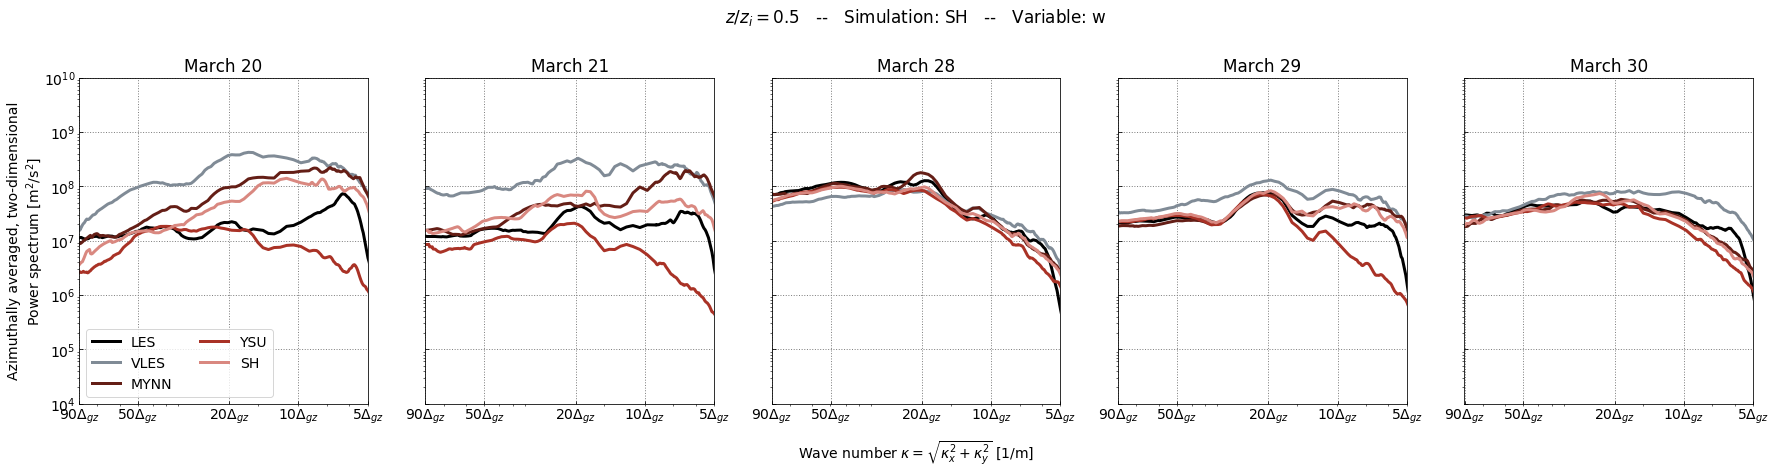

In [52]:
days  = subsets_by_day.keys()
ndays = len(days)
nsims = len(keys_in_order)

fig = plt.figure(figsize=(6*ndays,6))

axbig = fig.add_subplot(111)
axbig.spines['top'].set_color('none')
axbig.spines['bottom'].set_color('none')
axbig.spines['left'].set_color('none')
axbig.spines['right'].set_color('none')
axbig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axbig.set_ylabel("Azimuthally averaged, two-dimensional\nPower spectrum [m$^2$/s$^2$]")    
axbig.set_xlabel("Wave number $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$ [1/m]",labelpad=15)    
axbig.set_title("$z/z_i={0}$".format(z_zi_target)+"   --   Simulation: {0}".format(sim.upper())+"   --   Variable: {0}".format(varname),y=1.15)

axs = {}

for iax,day in enumerate(days):

    axs[iax] = fig.add_subplot(1,ndays,iax+1)
    axs[iax].grid(color='gray', linestyle=':', linewidth=1)
    df_subset_timeavg = dayavg_by_day[day].copy()
    for sim in keys_in_order:
        axs[iax].loglog(df_subset_timeavg.index, df_subset_timeavg[sim],lw=3,color=colors[sim],label=sim.upper())

    if iax>0:
        plt.setp(axs[iax].get_yticklabels(), visible=False)

    axs[iax].xaxis.set_tick_params(direction='in')
    axs[iax].yaxis.set_tick_params(direction='in')          

    if iax == 0:
        plt.legend(loc=3,ncol=2)

    axs[iax].set_xlim([minf,filterf])
    axs[iax].set_ylim([1e4,1e10])
    axs[iax].set_xlim([minf,filterf])
    axs[iax].set_xticks(xticks)
    axs[iax].set_xticklabels(xlabels)
    axs[iax].set_title('March {0}'.format(day))
 
fig.savefig("../figs/w_spectra_daily_panels_all_sims_mean.png", dpi=200, bbox_inches="tight")